In [1]:
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
# Check residuals
# Data residuals are in "Airfoil_flap_residual.npy" and "Airfoil_residual.npy"

n_airfoil_flap_data =  1931 n_airfoil_data =  1932


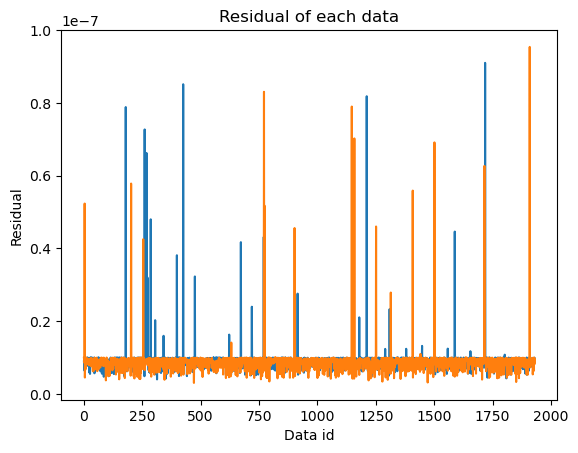

In [3]:
Airfoil_flap_residual = np.load("Airfoil_flap_residual.npy")
Airfoil_residual = np.load("Airfoil_residual.npy")
n_airfoil_flap_data = len(Airfoil_flap_residual)
n_airfoil_data = len(Airfoil_residual)
plt.plot(Airfoil_flap_residual, label="Airfoil flap")
plt.plot(Airfoil_residual, label="Airfoil")
plt.title("Residual of each data")
plt.xlabel("Data id")
plt.ylabel("Residual")
print("n_airfoil_flap_data = ", n_airfoil_flap_data, "n_airfoil_data = ", n_airfoil_data)

In [4]:
# Airfoil with flap 
# Airfoil with flap data are in "Airfoil_flap_data" folder
# There are two types of data 
# 1)fluid data in "fluid_mesh" 
# 2)airfoil data in "airfoil_mesh"

(<matplotlib.patches.Rectangle at 0x16841d290>,
 (<matplotlib.patches.ConnectionPatch at 0x168437e50>,
  <matplotlib.patches.ConnectionPatch at 0x16948b450>))

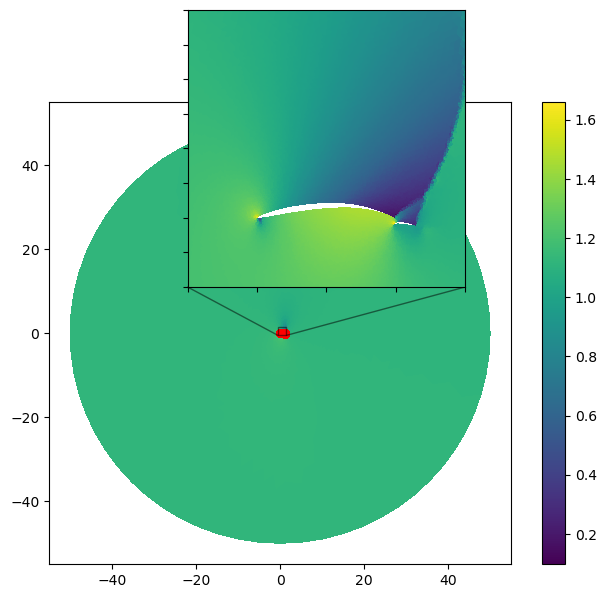

In [5]:
# For fluid data, there nodes_XXXXX.npy, elems_XXXXX.npy, features_XXXXX.npy
# nodes_XXXXX.npy contains x, y coordinate
# elems_XXXXX.npy contains e1, e2, e3, triangular nodal index (starting with 0)
# features_XXXXX.npy, contains p, mach, indicator, pressure, mach number, and indicator
# for the indicator, 0: interior node, 1: airfoil node, 2: farfield node

index = 0
nodes = np.load("Airfoil_flap_data/fluid_mesh/nodes_%05d.npy" %(index))
elems = np.load("Airfoil_flap_data/fluid_mesh/elems_%05d.npy" %(index))
features = np.load("Airfoil_flap_data/fluid_mesh/features_%05d.npy" %(index))


fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_aspect('equal')
tpc = ax.tripcolor(nodes[:,0], nodes[:,1], features[:,0], triangles = elems, shading='flat')
ax.scatter(nodes[features[:,2]==1, 0], nodes[features[:,2]==1, 1], color="red", linewidths=0.01)
ax.scatter(nodes[features[:,2]==2, 0], nodes[features[:,2]==2, 1], color="black", linewidths=0.01)
fig.colorbar(tpc, ax=ax)
    
# inset Axes....
x1, x2, y1, y2 = -0.5, 1.5, -0.5, 1.5  # subregion of the original image
axins = ax.inset_axes(
    [0.3, 0.6, 0.6, 0.6],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.tripcolor(nodes[:,0], nodes[:,1], features[:,0], triangles = elems, shading='flat')

ax.indicate_inset_zoom(axins, edgecolor="black")

    



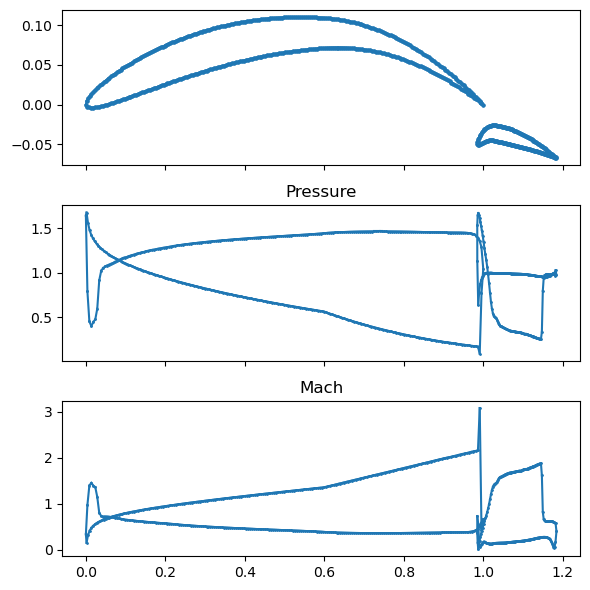

In [10]:
# For airfoil data, there nodes_XXXXX.npy, elems_XXXXX.npy, features_XXXXX.npy
# nodes_XXXXX.npy contains x, y coordinate
# elems_XXXXX.npy contains e1, e2, segment nodal index (starting with 0)
# features_XXXXX.npy, contains p, mach, indicator, pressure, mach number, and indicator
# for the indicator, 0: interior node, 1: airfoil node, 2: farfield node

index = 0
nodes = np.load("Airfoil_flap_data/airfoil_mesh/nodes_%05d.npy" %(index))
elems = np.load("Airfoil_flap_data/airfoil_mesh/elems_%05d.npy" %(index))
features = np.load("Airfoil_flap_data/airfoil_mesh/features_%05d.npy" %(index))


fig, axs = plt.subplots(3, 1, figsize=(6,6), sharex=True)
airfoil = nodes[elems, :] 
# segment k is airfoil[k, 0, :]-[k, 1, :]
axs[0].plot(airfoil[:,:,0].T, airfoil[:,:,1].T, "-o", color="C0", markersize=2)

airfoil_pressure, airfoil_mach, = features[:,0], features[:,1]
# segment k is airfoil[k, 0, :]-[k, 1, :]
axs[1].scatter(nodes[:,0], airfoil_pressure, color="C0", s=1)
axs[1].plot(airfoil[:,:,0].T, airfoil_pressure[elems].T, color="C0")
axs[1].set_title("Pressure")
axs[2].scatter(nodes[:,0], airfoil_mach, color="C0", s=1)
axs[2].plot(airfoil[:,:,0].T, airfoil_mach[elems].T, color="C0")
axs[2].set_title("Mach")
plt.tight_layout()
plt.show()
    



In [ ]:
# Airfoil 
# Airfoil data are in "Airfoil_data" folder
# There are two types of data 
# 1)fluid data in "fluid_mesh" 
# 2)airfoil data in "airfoil_mesh"

(<matplotlib.patches.Rectangle at 0x32fc63a90>,
 (<matplotlib.patches.ConnectionPatch at 0x32fc96590>,
  <matplotlib.patches.ConnectionPatch at 0x32fc0f690>))

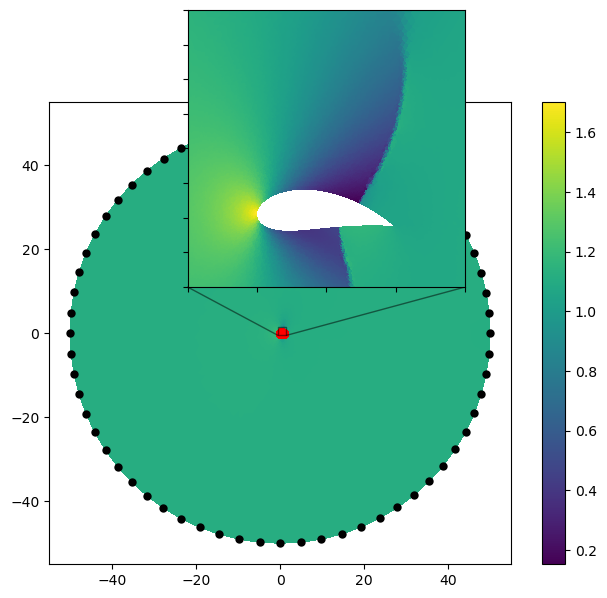

In [26]:
# For fluid data, there nodes_XXXXX.npy, elems_XXXXX.npy, features_XXXXX.npy
# nodes_XXXXX.npy contains x, y coordinate
# elems_XXXXX.npy contains e1, e2, e3, triangular nodal index (starting with 0)
# features_XXXXX.npy, contains p, mach, indicator, pressure, mach number, and indicator
# for the indicator, 0: interior node, 1: airfoil node, 2: farfield node

index = 0
nodes = np.load("Airfoil_data/fluid_mesh/nodes_%05d.npy" %(index))
elems = np.load("Airfoil_data/fluid_mesh/elems_%05d.npy" %(index))
features = np.load("Airfoil_data/fluid_mesh/features_%05d.npy" %(index))


fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_aspect('equal')
tpc = ax.tripcolor(nodes[:,0], nodes[:,1], features[:,0], triangles = elems, shading='flat')
ax.scatter(nodes[features[:,2]==1, 0], nodes[features[:,2]==1, 1], color="red", linewidths=0.01)
ax.scatter(nodes[features[:,2]==2, 0], nodes[features[:,2]==2, 1], color="black", linewidths=0.01)
fig.colorbar(tpc, ax=ax)
    
# inset Axes....
x1, x2, y1, y2 = -0.5, 1.5, -0.5, 1.5  # subregion of the original image
axins = ax.inset_axes(
    [0.3, 0.6, 0.6, 0.6],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.tripcolor(nodes[:,0], nodes[:,1], features[:,0], triangles = elems, shading='flat')

ax.indicate_inset_zoom(axins, edgecolor="black")

    



In [11]:
# For airfoil data, there nodes_XXXXX.npy, elems_XXXXX.npy, features_XXXXX.npy
# nodes_XXXXX.npy contains x, y coordinate
# elems_XXXXX.npy contains e1, e2, segment nodal index (starting with 0)
# features_XXXXX.npy, contains p, mach, indicator, pressure, mach number, and indicator
# for the indicator, 0: interior node, 1: airfoil node, 2: farfield node

index = 0
nodes = np.load("Airfoil_data/airfoil_mesh/nodes_%05d.npy" %(index))
elems = np.load("Airfoil_data/airfoil_mesh/elems_%05d.npy" %(index))
features = np.load("Airfoil_data/airfoil_mesh/features_%05d.npy" %(index))


fig, axs = plt.subplots(3, 1, figsize=(6,6), sharex=True)
airfoil = nodes[elems, :] 
# segment k is airfoil[k, 0, :]-[k, 1, :]
axs[0].plot(airfoil[:,:,0].T, airfoil[:,:,1].T, "-o", color="C0", markersize=2)

airfoil_pressure, airfoil_mach, = features[:,0], features[:,1]
# segment k is airfoil[k, 0, :]-[k, 1, :]
axs[1].scatter(nodes[:,0], airfoil_pressure, color="C0", s=1)
axs[1].plot(airfoil[:,:,0].T, airfoil_pressure[elems].T, color="C0")
axs[1].set_title("Pressure")
axs[2].scatter(nodes[:,0], airfoil_mach, color="C0", s=1)
axs[2].plot(airfoil[:,:,0].T, airfoil_mach[elems].T, color="C0")
axs[2].set_title("Mach")
plt.tight_layout()
plt.show()
    



FileNotFoundError: [Errno 2] No such file or directory: 'Airfoil_data/airfoil_mesh/nodes_00000.npy'